# The Project: Credit Scoring 

# Description:  Our project aims to build a comprehensive machine learning model for credit scoring. In today’s financial landscape, credit scoring presents significant challenges, particularly related to explainability and complexity.

# The Team: Daniaryuly Daniyal, Pirniyazov Miras, Baktibayev Daulet

# Roles: 
## Daniyaruly Daniyal: Data analysis and data preparation
## Pirniyazov Miras: Modelling: model selection and tuning
## Baktibayev Daulet: Evaluation and deployment: model interpretation and launching the model as a service

# Link to the service: https://credit-scoring-vz41.onrender.com

# there you can make a single prediction and get results as a zip file with SHAP explanation visuals and the decision themselves
# Or you can upload a whole file (test file with no flags is in github repository), and the result is a zip file with CSV file with predictions and decisions and different SHAP visuals which explain how model did come to its predictions

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

# the dataset
data = pd.read_csv('archive/train.csv')

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/2816151065.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('archive/train.csv')


In [3]:
flag = 'Credit_Score'

# Class of interest is Poor, i.e. unreliable loaners, therefore our model will focus on idenfying them
def flag_to_num(x):
    if x == 'Good' or x == 'Standard':
        return 0
    if x == 'Poor':
        return 1

data[flag] = data[flag].apply(flag_to_num)

In [4]:
from sklearn.model_selection import train_test_split
#train, test, valid splits

train, temp = train_test_split(data, test_size=0.3, stratify=data[flag], random_state=42)

test, val = train_test_split(temp, test_size=1/3, stratify=temp[flag], random_state=42)

In [5]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
12094,0x5cdc,CUS_0x3562,July,Marce,34_,821-34-2286,Media_Manager,43436.27,NaN,0,1,5,2,"Not Specified, and Mortgage Loan",11,1,_,4.0,Good,63.92,29.946936,17 Years and 5 Months,No,58.411588,87.44433220001284,High_spent_Large_value_payments,442.91299672547774,0
90066,0x225bc,CUS_0x5cb8,March,radk,34,445-76-5961,_______,15362.78_,1441.231667,9,6,26,6,"Debt Consolidation Loan, Student Loan, Mortgag...",57,23,17.12,7.0,_,3773.56,25.017261,NaN,Yes,45.754950,126.14020063907856,Low_spent_Small_value_payments,262.2280160743394,1
33414,0xd9c8,CUS_0x3bb8,July,Alister Bullt,35,855-98-5797,Doctor,41077.12,3390.093333,9,7,29,6_,"Debt Consolidation Loan, Debt Consolidation Lo...",62,20,1.19,12.0,Bad,1507.89,23.445592,9 Years and 11 Months,Yes,199.584000,132.28124819516694,High_spent_Medium_value_payments,257.1440847655278,0
39850,0xff80,CUS_0x8247,March,Daye,16,597-93-5210,Scientist,9670.15,733.845833,8,6,19,5,"Mortgage Loan, Auto Loan, Credit-Builder Loan,...",54,23,3.06,7.0,Bad,3566.81,29.913943,4 Years and 4 Months,Yes,35.319743,__10000__,Low_spent_Small_value_payments,281.3827838276423,1
10765,0x5513,CUS_0x91f,June,Thomas Ferrarot,44,740-45-3202,Doctor,21450.72,1713.560000,2,5,10,3,"Personal Loan, Payday Loan, and Home Equity Loan",6,5,5.41,1.0,Good,123.12,33.175057,33 Years and 3 Months,No,31.296901,NaN,High_spent_Large_value_payments,337.1057430916695,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 12094 to 27575
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        70000 non-null  object 
 1   Customer_ID               70000 non-null  object 
 2   Month                     70000 non-null  object 
 3   Name                      63051 non-null  object 
 4   Age                       70000 non-null  object 
 5   SSN                       70000 non-null  object 
 6   Occupation                70000 non-null  object 
 7   Annual_Income             70000 non-null  object 
 8   Monthly_Inhand_Salary     59571 non-null  float64
 9   Num_Bank_Accounts         70000 non-null  int64  
 10  Num_Credit_Card           70000 non-null  int64  
 11  Interest_Rate             70000 non-null  int64  
 12  Num_of_Loan               70000 non-null  object 
 13  Type_of_Loan              61981 non-null  object 
 14  Delay_f

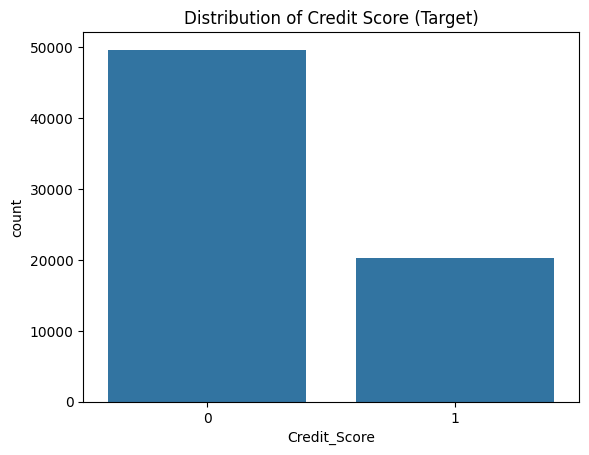

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Credit_Score', data=train)
plt.title('Distribution of Credit Score (Target)')
plt.show()

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/2553196808.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Month', palette='viridis', order=data['Month'].value_counts().index)


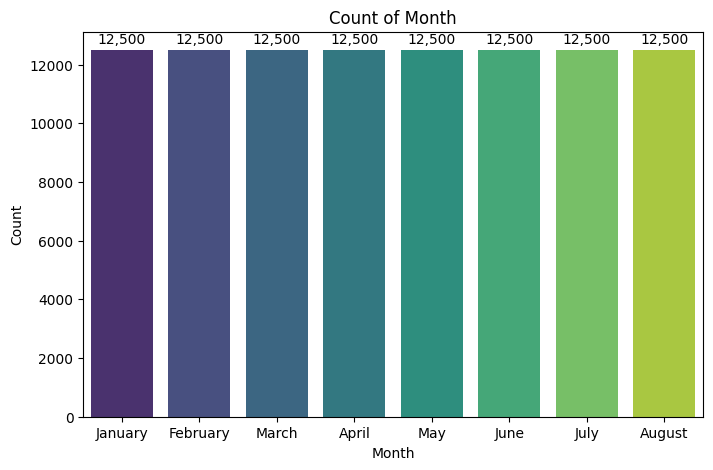

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/2553196808.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Occupation', palette='viridis', order=data['Occupation'].value_counts().index)


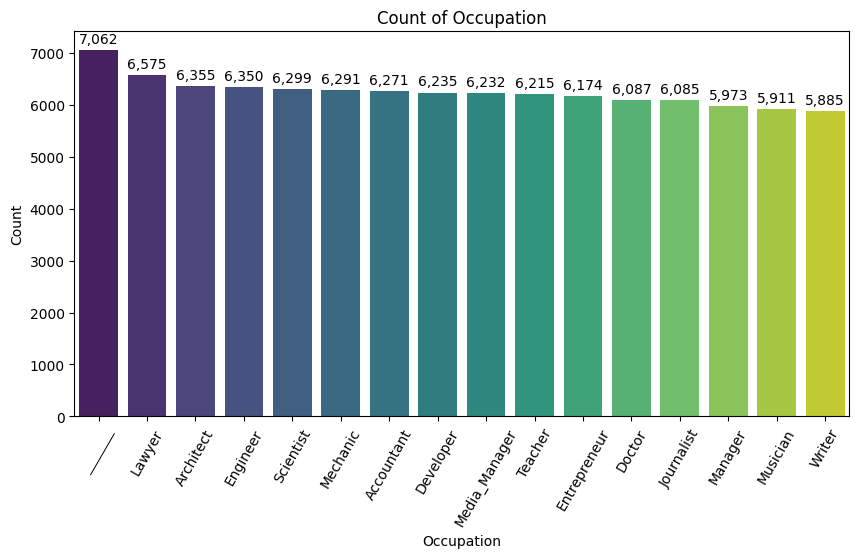

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/2553196808.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Credit_Mix', palette='viridis', order=data['Credit_Mix'].value_counts().index)


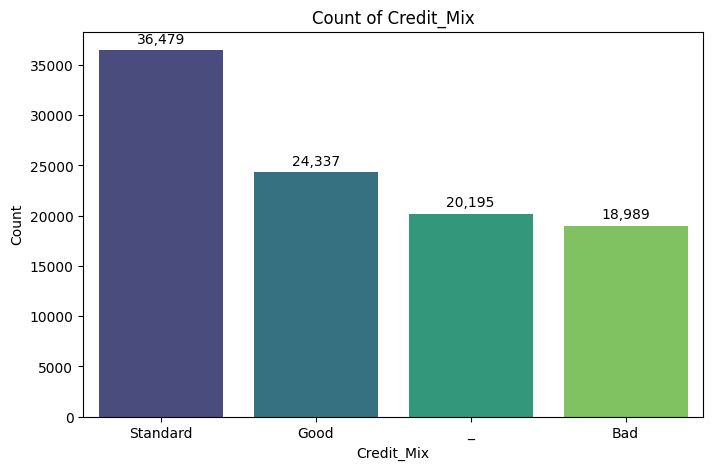

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/2553196808.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Payment_of_Min_Amount', palette='viridis', order=data['Payment_of_Min_Amount'].value_counts().index)


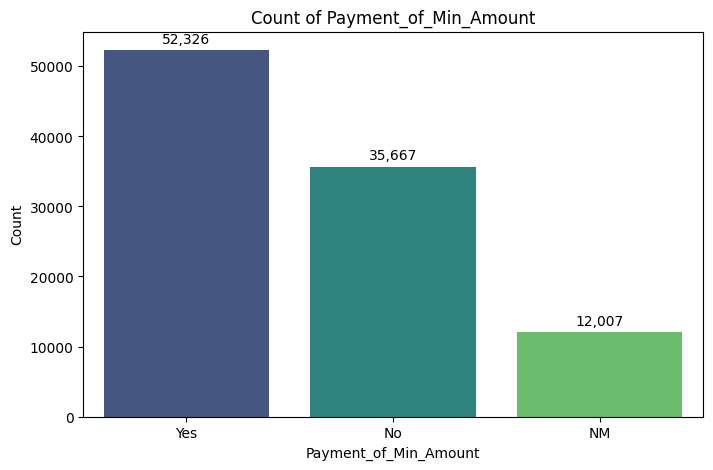

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/2553196808.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Payment_Behaviour', palette='viridis', order=data['Payment_Behaviour'].value_counts().index)


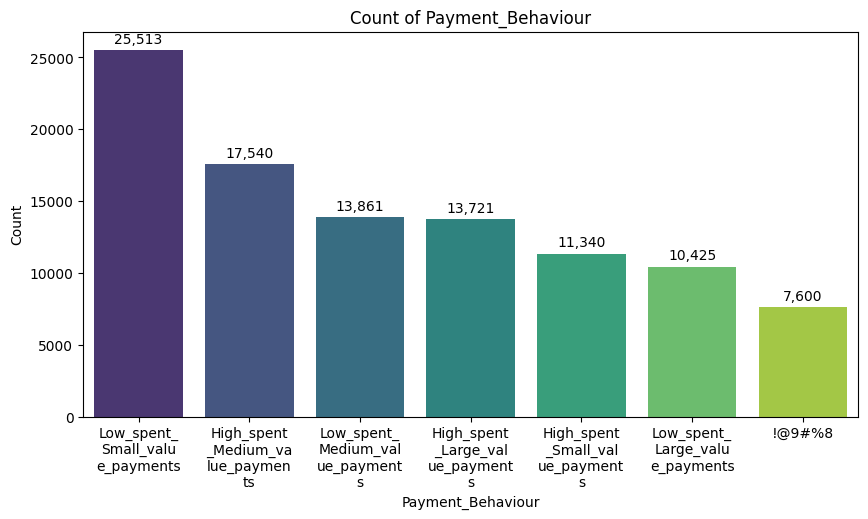

In [8]:
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count plots for each categorical column
# 1. Month
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Month', palette='viridis', order=data['Month'].value_counts().index)
plt.title(f'Count of Month')
plt.xticks(rotation=0)
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

plt.show()

# 2. Occupation
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='Occupation', palette='viridis', order=data['Occupation'].value_counts().index)
plt.title(f'Count of Occupation')
plt.xticks(rotation=60)
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

plt.show()

# 3. Credit_Mix
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Credit_Mix', palette='viridis', order=data['Credit_Mix'].value_counts().index)
plt.title(f'Count of Credit_Mix')
plt.xticks(rotation=0)
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

plt.show()

# 4. Payment_of_Min_Amount
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Payment_of_Min_Amount', palette='viridis', order=data['Payment_of_Min_Amount'].value_counts().index)
plt.title(f'Count of Payment_of_Min_Amount')
plt.xticks(rotation=0)
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

plt.show()

# 5. Payment_Behaviour
new_labels = ['\n'.join(textwrap.wrap(label, 10)) for label in data['Payment_Behaviour'].value_counts().index]

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='Payment_Behaviour', palette='viridis', order=data['Payment_Behaviour'].value_counts().index)
plt.title('Count of Payment_Behaviour')
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0)
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

plt.show()

In [9]:
columns = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

for column in columns:
    print(train[column].value_counts())

Age
26       1966
28       1964
31       1953
38       1941
25       1929
         ... 
4431        1
6408_       1
2366        1
620         1
6043        1
Name: count, Length: 1319, dtype: int64
Num_Bank_Accounts
7       9032
6       9010
8       8945
4       8497
5       8440
        ... 
817        1
1549       1
1654       1
894        1
828        1
Name: count, Length: 730, dtype: int64
Num_Credit_Card
5       12916
7       11606
6       11583
4        9855
3        9304
        ...  
270         1
1460        1
80          1
1393        1
974         1
Name: count, Length: 998, dtype: int64
Interest_Rate
8       3512
5       3466
6       3247
10      3211
7       3180
        ... 
3684       1
955        1
284        1
405        1
2943       1
Name: count, Length: 1294, dtype: int64
Num_of_Loan
3       10057
2       10004
4        9897
0        7276
1        7042
        ...  
1271        1
1400        1
520         1
405         1
1387        1
Name: count, Length: 310, dtyp

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/1094121330.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Age_Group', palette='viridis', order=data['Age_Group'].value_counts().index)


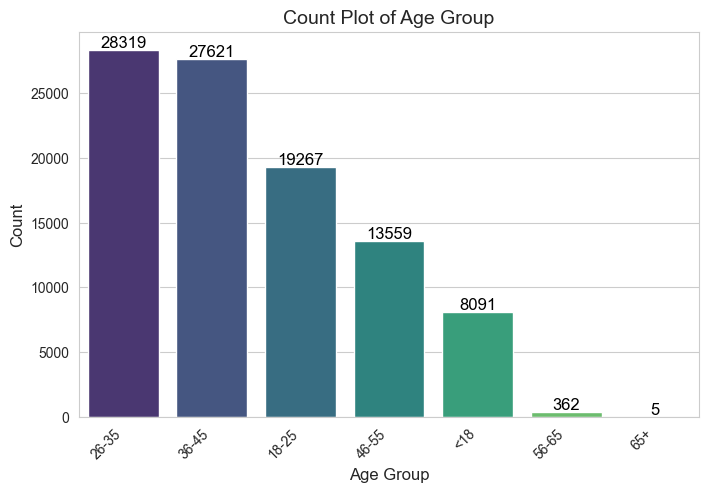

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/1094121330.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Num_Bank_Accounts_Binned', palette='viridis', order=data['Num_Bank_Accounts_Binned'].value_counts().index)


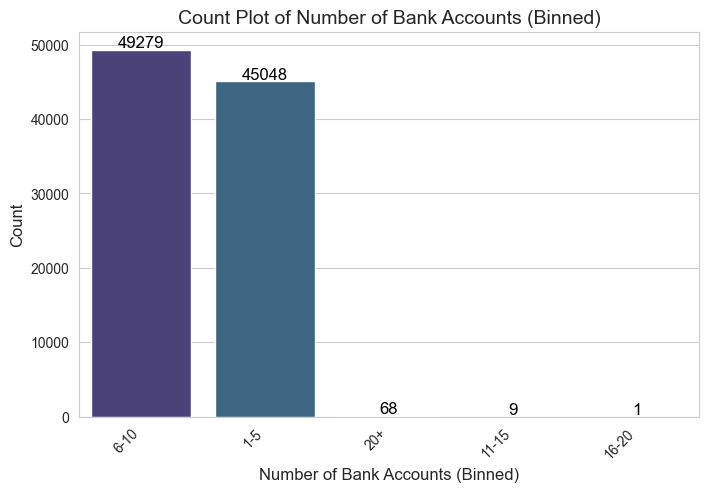

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/1094121330.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Num_Credit_Card_Binned', palette='viridis', order=data['Num_Credit_Card_Binned'].value_counts().index)


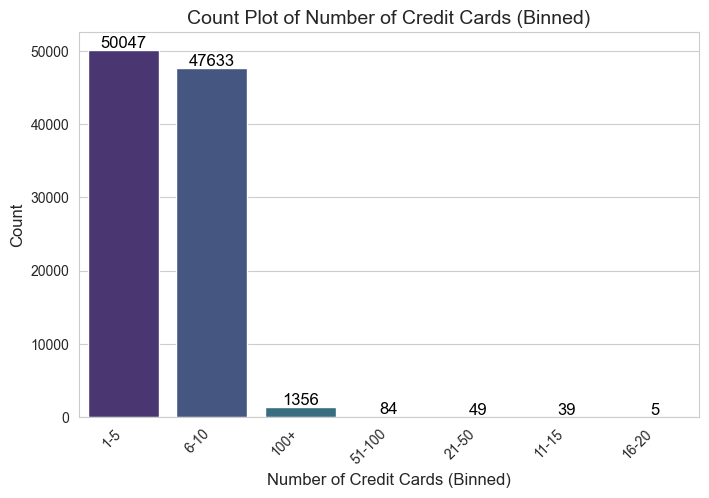

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/1094121330.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Interest_Rate_Group', palette='viridis', order=data['Interest_Rate_Group'].value_counts().index)


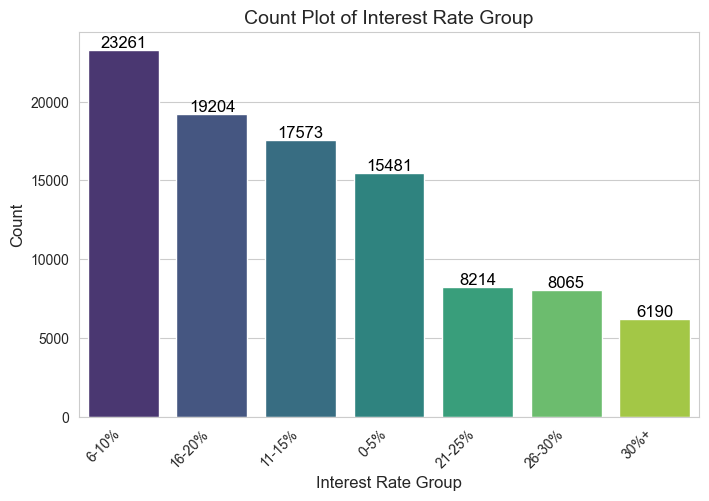

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/1094121330.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Num_of_Loan_Binned', palette='viridis', order=data['Num_of_Loan_Binned'].value_counts().index)


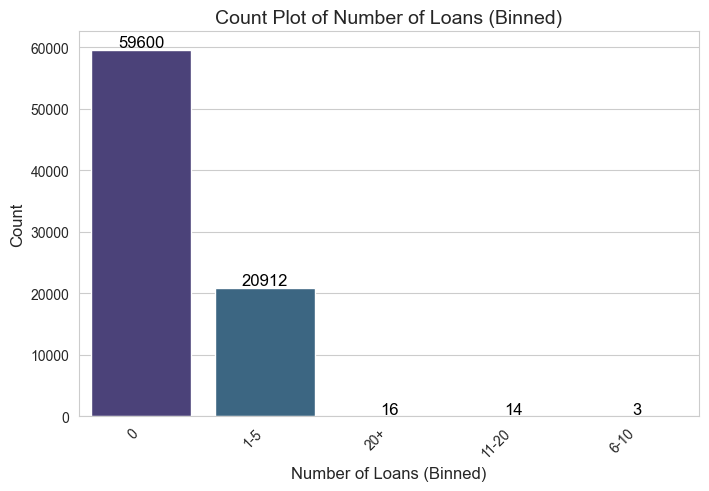

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/1094121330.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Delay_from_due_date_Binned', palette='viridis', order=data['Delay_from_due_date_Binned'].value_counts().index)


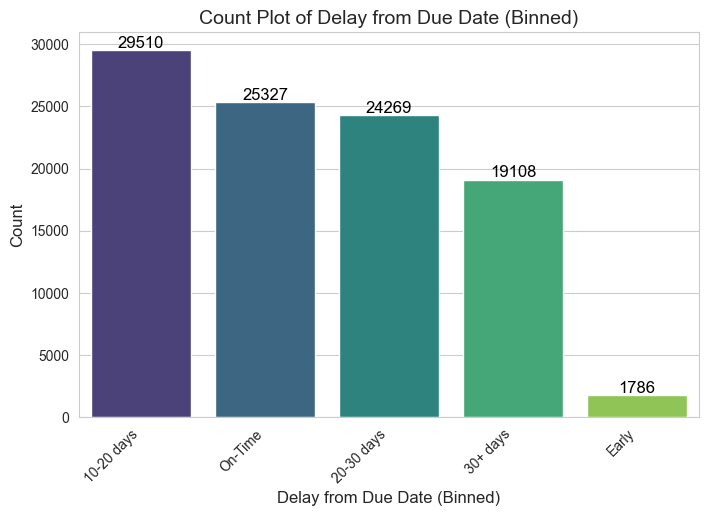

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/1094121330.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Num_of_Delayed_Payment_Binned', palette='viridis', order=data['Num_of_Delayed_Payment_Binned'].value_counts().index)


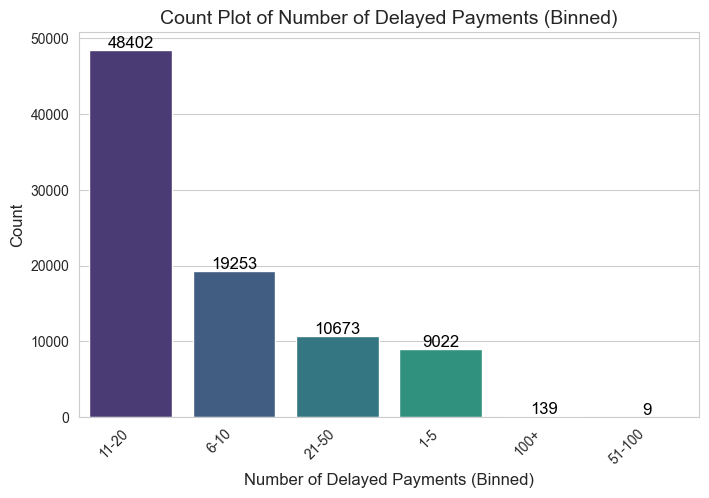

/var/folders/nv/6s4s5p915nsddv_m0lqn78hw0000gn/T/ipykernel_19201/1094121330.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Num_Credit_Inquiries_Binned', palette='viridis', order=data['Num_Credit_Inquiries_Binned'].value_counts().index)


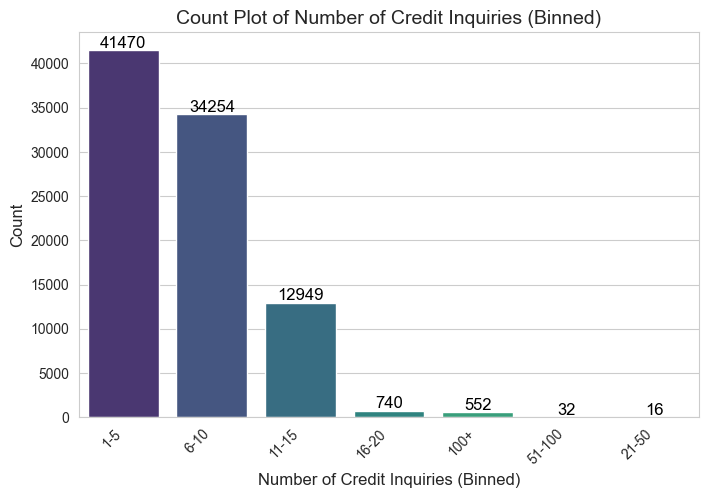

In [10]:
# Plotting count plots for each categorical numerical columns
# Age, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries

# Grouping Age into bins
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['Age_Group'] = pd.cut(data['Age'].replace({'_': ''}, regex=True).astype(float), bins=age_bins, labels=age_labels)

# Binning Num_Bank_Accounts
data['Num_Bank_Accounts_Binned'] = pd.cut(data['Num_Bank_Accounts'], 
                                          bins=[0, 5, 10, 15, 20, 100], 
                                          labels=['1-5', '6-10', '11-15', '16-20', '20+'])

# Binning Num_Credit_Card
data['Num_Credit_Card_Binned'] = pd.cut(data['Num_Credit_Card'], 
                                         bins=[0, 5, 10, 15, 20, 50, 100, 1000], 
                                         labels=['1-5', '6-10', '11-15', '16-20', '21-50', '51-100', '100+'])

# Grouping Interest Rate into bins
interest_rate_bins = [0, 5, 10, 15, 20, 25, 30, 100]
interest_rate_labels = ['0-5%', '6-10%', '11-15%', '16-20%', '21-25%', '26-30%', '30%+']
data['Interest_Rate_Group'] = pd.cut(data['Interest_Rate'].replace({'_': ''}, regex=True).astype(float), 
                                      bins=interest_rate_bins, labels=interest_rate_labels)

# Converting the 'Num_of_Loan' column to numeric, handling errors
data['Num_of_Loan'] = pd.to_numeric(data['Num_of_Loan'], errors='coerce')

# Binning Num_of_Loan
data['Num_of_Loan_Binned'] = pd.cut(data['Num_of_Loan'], 
                                    bins=[0, 5, 10, 20, 50, 100], 
                                    labels=['0', '1-5', '6-10', '11-20', '20+'])

# Binning Delay_from_due_date
data['Delay_from_due_date_Binned'] = pd.cut(data['Delay_from_due_date'], 
                                            bins=[-10, 0, 10, 20, 30, 100], 
                                            labels=['Early', 'On-Time', '10-20 days', '20-30 days', '30+ days'])

# Converting the 'Num_of_Delayed_Payment' column to numeric, handling errors
data['Num_of_Delayed_Payment'] = pd.to_numeric(data['Num_of_Delayed_Payment'], errors='coerce')

# Binning Num_of_Delayed_Payment
data['Num_of_Delayed_Payment_Binned'] = pd.cut(data['Num_of_Delayed_Payment'], 
                                               bins=[0, 5, 10, 20, 50, 100, 1000], 
                                               labels=['1-5', '6-10', '11-20', '21-50', '51-100', '100+'])

# Binning Num_Credit_Inquiries
data['Num_Credit_Inquiries_Binned'] = pd.cut(data['Num_Credit_Inquiries'], 
                                              bins=[0, 5, 10, 15, 20, 50, 100, 1000], 
                                              labels=['1-5', '6-10', '11-15', '16-20', '21-50', '51-100', '100+'])

# Setting the plot style
sns.set_style('whitegrid')

# Function to add count labels on the bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

# 1. Age Group
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Age_Group', palette='viridis', order=data['Age_Group'].value_counts().index)
add_count_labels(ax)
plt.xticks(rotation=45, ha="right")
plt.title('Count Plot of Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 2. Num_Bank_Accounts
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Num_Bank_Accounts_Binned', palette='viridis', order=data['Num_Bank_Accounts_Binned'].value_counts().index)
add_count_labels(ax)
plt.xticks(rotation=45, ha="right")
plt.title('Count Plot of Number of Bank Accounts (Binned)', fontsize=14)
plt.xlabel('Number of Bank Accounts (Binned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 3. Num_Credit_Card
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Num_Credit_Card_Binned', palette='viridis', order=data['Num_Credit_Card_Binned'].value_counts().index)
add_count_labels(ax)
plt.xticks(rotation=45, ha="right")
plt.title('Count Plot of Number of Credit Cards (Binned)', fontsize=14)
plt.xlabel('Number of Credit Cards (Binned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 4. Interest Rate Group
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Interest_Rate_Group', palette='viridis', order=data['Interest_Rate_Group'].value_counts().index)
add_count_labels(ax)
plt.xticks(rotation=45, ha="right")
plt.title('Count Plot of Interest Rate Group', fontsize=14)
plt.xlabel('Interest Rate Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 5. Num_of_Loan
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Num_of_Loan_Binned', palette='viridis', order=data['Num_of_Loan_Binned'].value_counts().index)
add_count_labels(ax)
plt.xticks(rotation=45, ha="right")
plt.title('Count Plot of Number of Loans (Binned)', fontsize=14)
plt.xlabel('Number of Loans (Binned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 6. Delay from Due Date
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Delay_from_due_date_Binned', palette='viridis', order=data['Delay_from_due_date_Binned'].value_counts().index)
add_count_labels(ax)
plt.xticks(rotation=45, ha="right")
plt.title('Count Plot of Delay from Due Date (Binned)', fontsize=14)
plt.xlabel('Delay from Due Date (Binned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 7. Num_of_Delayed_Payment
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Num_of_Delayed_Payment_Binned', palette='viridis', order=data['Num_of_Delayed_Payment_Binned'].value_counts().index)
add_count_labels(ax)
plt.xticks(rotation=45, ha="right")
plt.title('Count Plot of Number of Delayed Payments (Binned)', fontsize=14)
plt.xlabel('Number of Delayed Payments (Binned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 8. Num_Credit_Inquiries
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Num_Credit_Inquiries_Binned', palette='viridis', order=data['Num_Credit_Inquiries_Binned'].value_counts().index)
add_count_labels(ax)
plt.xticks(rotation=45, ha="right")
plt.title('Count Plot of Number of Credit Inquiries (Binned)', fontsize=14)
plt.xlabel('Number of Credit Inquiries (Binned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [11]:
temp = data.copy()

In [12]:
import numpy as np

numerical_cols = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

# Remove underscores and convert the columns to float
for col in numerical_cols:
    # Convert the column to strings to apply string operations
    temp[col] = temp[col].astype(str)
    
    # Remove underscores from numbers with decimals like '34.4_'
    temp[col] = temp[col].replace({'_': ''}, regex=True)
    
    # Replace empty strings with NaN
    temp[col] = temp[col].replace({'': np.nan})
    
    # Convert to float, coercing errors to NaN
    temp[col] = pd.to_numeric(temp[col], errors='coerce')

# Check the temp types after cleaning
print(temp[numerical_cols].dtypes)

Annual_Income               float64
Monthly_Inhand_Salary       float64
Changed_Credit_Limit        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
dtype: object


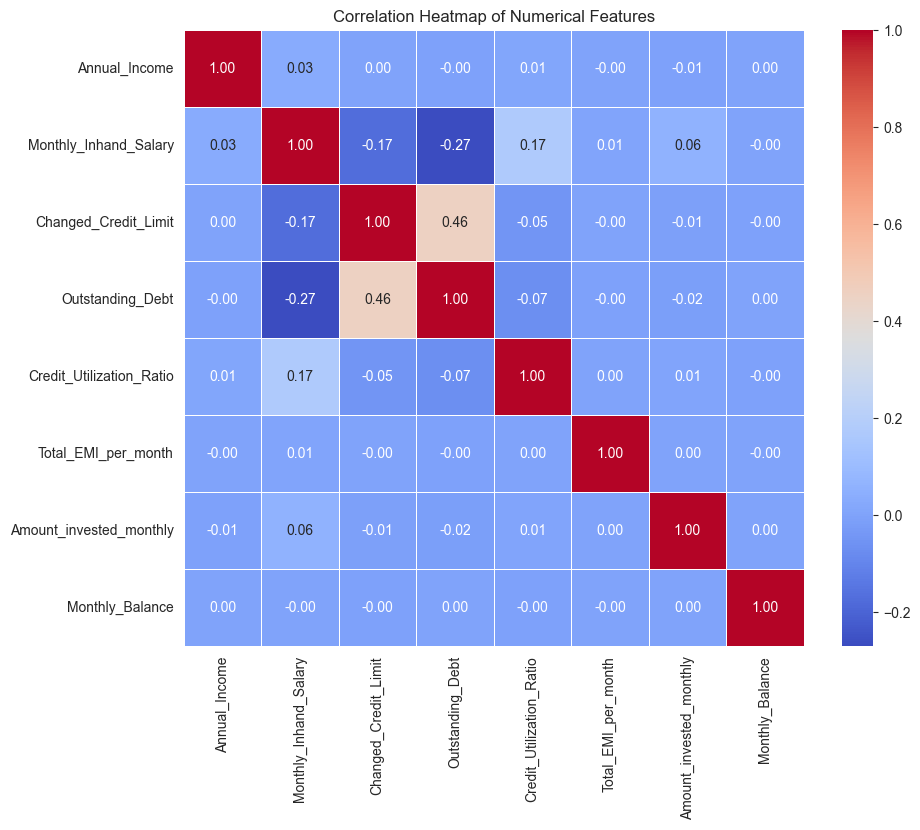

In [13]:
# Calculate the correlation matrix
correlation_matrix = temp[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(self.columns, axis=1)

class DTypeCorrection(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for col in self.columns:
            X_transformed[col] = X_transformed[col].apply(lambda x: float(str(x).replace('_', '')) if x != '_' else  0)
            X_transformed[col] = X_transformed[col].astype('float')

        return X_transformed



class FillNA(BaseEstimator, TransformerMixin):
    def __init__(self, fill_values):
        self.fill_values = fill_values

    def fit(self, X, y=None):
        for k, v in self.fill_values.items():
            if v == "median":
                median = X[k].median()
                self.fill_values[k] = median

            if v == "mean":
                mean = X[k].mean()
                self.fill_values[k] = mean

            if v == "mode":
                mode = X[k].mode()[0]
                self.fill_values[k] = mode
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for k, v in self.fill_values.items():
            X_transformed[k].fillna(v, inplace=True)

        return X_transformed

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.type_of_loans = []
        for vals in X['Type_of_Loan'].tolist():
            vals = vals.replace('and ', '')
            for loans in vals.split(', '):
                if loans not in self.type_of_loans:
                    self.type_of_loans.append(loans)

        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for val in self.type_of_loans:
            X_transformed[val] = X_transformed['Type_of_Loan'].apply(lambda x: 1 if val in x else 0)

        X_transformed['Credit_History_Years'] = X_transformed['Credit_History_Age'].apply(lambda x: 0 if x == '0' else float(x.split(' Years')[0]))

        X_transformed['Credit_History_Months'] = X_transformed['Credit_History_Age'].apply(lambda x: 0 if x == '0' else float(x.split(' and ')[1].split(' Months')[0]))

        X_transformed['Spent'] = X_transformed['Payment_Behaviour'].apply(lambda x: 'Unknown' if 'spent' not in x else x.split('_spent_')[0])
        X_transformed['Value_Payments'] = X_transformed['Payment_Behaviour'].apply(lambda x: 'Unknown' if '_value_payments' not in x else x.split('_value_payments')[0].split('_spent_')[1])

        return X_transformed.drop(['Credit_History_Age', 'Type_of_Loan', 'Payment_Behaviour'], axis=1)

class Scaler_Encoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        categorical_columns = X.select_dtypes(exclude=[np.number]).columns

        scaler = StandardScaler()
        ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

        self.transformer = ColumnTransformer([
            ('numeric', scaler, numeric_columns),
            ('categorical', ohe, categorical_columns)
        ])
        self.transformer.fit(X)
        return self

    def transform(self, X, y=None):
        import pandas as pd
        X_transformed = self.transformer.transform(X)
        features_name = self.transformer.get_feature_names_out()
        X_transformed = pd.DataFrame(X_transformed, columns=features_name)
        return X_transformed

import numpy as np

class MulticollinearityReducer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.65):
        self.threshold = threshold
        self.features_to_drop = []

    def fit(self, X, y=None):
        X_temp = X.copy()
        while True:
            corr_matrix = X_temp.corr().abs()

            upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

            max_corr = upper_triangle.max().max()

            if max_corr <= self.threshold:
                break


            to_drop = upper_triangle.stack().idxmax()
            feature_to_drop = to_drop[1]
            self.features_to_drop.append(feature_to_drop)

            X_temp = X_temp.drop(columns=[feature_to_drop])

        self.feature_names_out_ = X_temp.columns
        return self

    def transform(self, X, y=None):
        return X.drop(self.features_to_drop, axis=1)

    def get_feature_names_out(self):
        return self.feature_names_out_


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 12094 to 27575
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        70000 non-null  object 
 1   Customer_ID               70000 non-null  object 
 2   Month                     70000 non-null  object 
 3   Name                      63051 non-null  object 
 4   Age                       70000 non-null  object 
 5   SSN                       70000 non-null  object 
 6   Occupation                70000 non-null  object 
 7   Annual_Income             70000 non-null  object 
 8   Monthly_Inhand_Salary     59571 non-null  float64
 9   Num_Bank_Accounts         70000 non-null  int64  
 10  Num_Credit_Card           70000 non-null  int64  
 11  Interest_Rate             70000 non-null  int64  
 12  Num_of_Loan               70000 non-null  object 
 13  Type_of_Loan              61981 non-null  object 
 14  Delay_f

In [9]:
pipeline = Pipeline([
    ('Drop_Columns', ColumnDropper(columns = ['ID', 'Customer_ID', 'Name', 'SSN'])),

    ('DType_Correction', DTypeCorrection(columns=['Num_of_Loan', 'Age', 'Annual_Income', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'])),

    ('Fill_NA', FillNA(fill_values = {'Monthly_Inhand_Salary': 'mean', 'Type_of_Loan': 'Not Specified', 'Num_of_Delayed_Payment': 'median', 'Num_Credit_Inquiries': 'median', 'Credit_History_Age': '0', 'Amount_invested_monthly': 'mean', 'Monthly_Balance': 'mean'})),

    ('Feature_Engineer', FeatureEngineer()),

    ('Scaler_Encoder', Scaler_Encoder()),
   ('Multicollinearity_reducer', MulticollinearityReducer())

])

In [10]:
X_train, X_test, X_val, y_train, y_test, y_val = train.drop(flag, axis=1), test.drop(flag, axis=1), val.drop([flag], axis=1), train[flag], test[flag], val[flag]

In [11]:
pipeline.fit(X_train)

C:\Users\justb\AppData\Local\Temp\ipykernel_11108\3135208905.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_transformed[k].fillna(v, inplace=True)


Pipeline(steps=[('Drop_Columns',
                 ColumnDropper(columns=['ID', 'Customer_ID', 'Name', 'SSN'])),
                ('DType_Correction',
                 DTypeCorrection(columns=['Num_of_Loan', 'Age', 'Annual_Income',
                                          'Num_of_Delayed_Payment',
                                          'Changed_Credit_Limit',
                                          'Outstanding_Debt',
                                          'Amount_invested_monthly',
                                          'Monthly_Balance'])),
                ('Fill_NA',
                 FillNA(fill_values={'Amount_invested_monthly': 637.2277950035283,
                                     'Credit_History_Age': '0',
                                     'Monthly_Balance': -2.4098708309234625e+22,
                                     'Monthly_Inhand_Salary': 4202.696985969621,
                                     'Num_Credit_Inquiries': 6.0,
                                     'Num_of_Delayed_Payment': 14.0,
                                     'Type_of_Loan': 'Not Specified'})),
                ('Feature_Engineer', FeatureEngineer()),
                ('Scaler_Encoder', Scaler_Encoder()),
                ('Multicollinearity_reducer', MulticollinearityReducer())])

In [12]:
pipeline['Feature_Engineer'].type_of_loans

['Not Specified',
 'Mortgage Loan',
 'Debt Consolidation Loan',
 'Student Loan',
 'Auto Loan',
 'Credit-Builder Loan',
 'Payday Loan',
 'Personal Loan',
 'Home Equity Loan']

In [13]:
import warnings

warnings.filterwarnings('ignore')

X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)
X_val_transformed = pipeline.transform(X_val)

In [14]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   numeric__Age                           70000 non-null  float64
 1   numeric__Annual_Income                 70000 non-null  float64
 2   numeric__Monthly_Inhand_Salary         70000 non-null  float64
 3   numeric__Num_Bank_Accounts             70000 non-null  float64
 4   numeric__Num_Credit_Card               70000 non-null  float64
 5   numeric__Interest_Rate                 70000 non-null  float64
 6   numeric__Num_of_Loan                   70000 non-null  float64
 7   numeric__Delay_from_due_date           70000 non-null  float64
 8   numeric__Num_of_Delayed_Payment        70000 non-null  float64
 9   numeric__Changed_Credit_Limit          70000 non-null  float64
 10  numeric__Num_Credit_Inquiries          70000 non-null  float64
 11  nu

In [15]:
y_train.value_counts()

Credit_Score
0    49701
1    20299
Name: count, dtype: int64

In [16]:
# Class imbalance hadnling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_transformed_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)
y_train_smote.value_counts()

  File "C:\Users\justb\Desktop\MAGA\ml_fall_2024\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Credit_Score
0    49701
1    49701
Name: count, dtype: int64

[I 2024-12-29 17:42:21,219] A new study created in memory with name: no-name-1cbb2d6f-13c8-4297-bbef-0f2abbe8c501


Tuning Logistic Regression...


[I 2024-12-29 17:42:21,874] Trial 0 finished with value: 0.7911947450501909 and parameters: {'C': 0.5352235924619946, 'max_iter': 292}. Best is trial 0 with value: 0.7911947450501909.
[I 2024-12-29 17:42:22,471] Trial 1 finished with value: 0.7912024403809854 and parameters: {'C': 2.4359172659364106, 'max_iter': 487}. Best is trial 1 with value: 0.7912024403809854.
[I 2024-12-29 17:42:23,076] Trial 2 finished with value: 0.7911966112022032 and parameters: {'C': 9.188595303198955, 'max_iter': 505}. Best is trial 1 with value: 0.7912024403809854.
[I 2024-12-29 17:42:23,776] Trial 3 finished with value: 0.7911967002626932 and parameters: {'C': 7.70371645405722, 'max_iter': 874}. Best is trial 1 with value: 0.7912024403809854.
[I 2024-12-29 17:42:24,484] Trial 4 finished with value: 0.7912027216941058 and parameters: {'C': 3.6242267852065786, 'max_iter': 983}. Best is trial 4 with value: 0.7912027216941058.
[I 2024-12-29 17:42:25,162] Trial 5 finished with value: 0.7911966213289935 and par

Best parameters for Logistic Regression: {'C': 3.6242267852065786, 'max_iter': 983}
Tuning Random Forest...


[I 2024-12-29 17:42:29,819] Trial 0 finished with value: 0.8248290065030919 and parameters: {'n_estimators': 12, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8248290065030919.
[I 2024-12-29 17:42:43,931] Trial 1 finished with value: 0.8340658191859189 and parameters: {'n_estimators': 84, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.8340658191859189.
[I 2024-12-29 17:44:05,538] Trial 2 finished with value: 0.8811083543206119 and parameters: {'n_estimators': 47, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.8811083543206119.
[I 2024-12-29 17:45:23,527] Trial 3 finished with value: 0.8309098436429586 and parameters: {'n_estimators': 52, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': None

Best parameters for Random Forest: {'n_estimators': 47, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}
Tuning XGBoost...


[I 2024-12-29 17:48:01,851] Trial 0 finished with value: 0.9583156040099035 and parameters: {'n_estimators': 277, 'max_depth': 9, 'learning_rate': 0.034048492708531476, 'subsample': 0.8202717861024355, 'colsample_bytree': 0.8805489837650188, 'gamma': 3.7348209546199778, 'min_child_weight': 6}. Best is trial 0 with value: 0.9583156040099035.
[I 2024-12-29 17:48:04,783] Trial 1 finished with value: 0.9501395455658009 and parameters: {'n_estimators': 179, 'max_depth': 4, 'learning_rate': 0.18096462094318952, 'subsample': 0.8731371504124176, 'colsample_bytree': 0.7830358261824677, 'gamma': 4.423349809136217, 'min_child_weight': 5}. Best is trial 0 with value: 0.9583156040099035.
[I 2024-12-29 17:48:09,423] Trial 2 finished with value: 0.9539905216352471 and parameters: {'n_estimators': 233, 'max_depth': 4, 'learning_rate': 0.18079228881721102, 'subsample': 0.838442965948922, 'colsample_bytree': 0.9495028210931904, 'gamma': 2.5376170625680268, 'min_child_weight': 3}. Best is trial 0 with va

Best parameters for XGBoost: {'n_estimators': 265, 'max_depth': 10, 'learning_rate': 0.17801470043497505, 'subsample': 0.7758404339578129, 'colsample_bytree': 0.8000696599631684, 'gamma': 0.44022873517097716, 'min_child_weight': 1}
Tuning LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39761, number of negative: 39760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 79521, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500006 -> initscore=0.000025
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2024-12-29 17:49:04,549] Trial 0 finished with value: 0.9397188674438901 and parameters: {'n_estimators': 158, 'max_depth': 3, 'learning_rate': 0.07307019452682333, 'num_leaves': 86, 'subsample': 0.7563195214235, 'colsample_bytree': 0.8405808493135747}. Best is trial 0 with value: 0.9397188674438901.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39761, number of negative: 39760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 79521, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500006 -> initscore=0.000025
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-12-29 17:49:08,146] Trial 1 finished with value: 0.9523806510719028 and parameters: {'n_estimators': 112, 'max_depth': 7, 'learning_rate': 0.071713648095138, 'num_leaves': 92, 'subsample': 0.9213343934815948, 'colsample_bytree': 0.9682625274485808}. Best is trial 1 with value: 0.9523806510719028.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39761, number of negative: 39760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 79521, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500006 -> initscore=0.000025
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-12-29 17:49:10,415] Trial 2 finished with value: 0.9509501063277128 and parameters: {'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.10212208124775077, 'num_leaves': 86, 'subsample': 0.8059952825177141, 'colsample_bytree': 0.8228166906904996}. Best is trial 1 with value: 0.9523806510719028.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-29 17:49:13,863] Trial 3 finished with value: 0.9581091449698601 and parameters: {'n_estimators': 283, 'max_depth': 13, 'learning_rate': 0.07585408384287386, 'num_leaves': 29, 'subsample': 0.8505917202970009, 'colsample_bytree': 0.7803707648383877}. Best is trial 3 with value: 0.9581091449698601.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39761, number of negative: 39760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 79521, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500006 -> initscore=0.000025
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_nam

[I 2024-12-29 17:49:16,949] Trial 4 finished with value: 0.9595297661601633 and parameters: {'n_estimators': 114, 'max_depth': 8, 'learning_rate': 0.11326731847666813, 'num_leaves': 94, 'subsample': 0.9659772119279018, 'colsample_bytree': 0.8824231458929006}. Best is trial 4 with value: 0.9595297661601633.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39761, number of negative: 39760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 79521, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500006 -> initscore=0.000025
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39760, number of negative: 39761
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[Lig

[I 2024-12-29 17:49:18,879] Trial 5 finished with value: 0.9407229833993836 and parameters: {'n_estimators': 126, 'max_depth': 5, 'learning_rate': 0.04171577162684553, 'num_leaves': 21, 'subsample': 0.8507047262248145, 'colsample_bytree': 0.823442349008989}. Best is trial 4 with value: 0.9595297661601633.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39761, number of negative: 39760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 79521, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500006 -> initscore=0.000025
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-12-29 17:49:21,857] Trial 6 finished with value: 0.9465964692352873 and parameters: {'n_estimators': 281, 'max_depth': 4, 'learning_rate': 0.0480499662948194, 'num_leaves': 23, 'subsample': 0.9220085761222736, 'colsample_bytree': 0.9355711646568042}. Best is trial 4 with value: 0.9595297661601633.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-29 17:49:24,026] Trial 7 finished with value: 0.9609998290223238 and parameters: {'n_estimators': 115, 'max_depth': 15, 'learning_rate': 0.17376880795860153, 'num_leaves': 49, 'subsample': 0.9026867728769736, 'colsample_bytree': 0.9711883145541823}. Best is trial 7 with value: 0.9609998290223238.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39761, number of negative: 39760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 79521, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500006 -> initscore=0.000025
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-12-29 17:49:25,740] Trial 8 finished with value: 0.9202990836796543 and parameters: {'n_estimators': 218, 'max_depth': 3, 'learning_rate': 0.02002363413064584, 'num_leaves': 42, 'subsample': 0.7678586845611052, 'colsample_bytree': 0.75249049856703}. Best is trial 7 with value: 0.9609998290223238.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39761, number of negative: 39760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14535
[LightGBM] [Info] Number of data points in the train set: 79521, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500006 -> initscore=0.000025
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-12-29 17:49:29,441] Trial 9 finished with value: 0.9625685100066008 and parameters: {'n_estimators': 206, 'max_depth': 7, 'learning_rate': 0.12198055388404139, 'num_leaves': 72, 'subsample': 0.7829201424930903, 'colsample_bytree': 0.7738407005572722}. Best is trial 9 with value: 0.9625685100066008.
[I 2024-12-29 17:49:29,441] A new study created in memory with name: no-name-7178fe7e-5e2f-4e81-bc71-6b08f75bc076


Best parameters for LightGBM: {'n_estimators': 206, 'max_depth': 7, 'learning_rate': 0.12198055388404139, 'num_leaves': 72, 'subsample': 0.7829201424930903, 'colsample_bytree': 0.7738407005572722}
Tuning CatBoost...


[I 2024-12-29 17:49:34,802] Trial 0 finished with value: 0.9489500793928496 and parameters: {'iterations': 165, 'depth': 4, 'learning_rate': 0.19619008315945582, 'l2_leaf_reg': 6.046702470456592}. Best is trial 0 with value: 0.9489500793928496.
[I 2024-12-29 17:49:44,781] Trial 1 finished with value: 0.9501681028538034 and parameters: {'iterations': 241, 'depth': 4, 'learning_rate': 0.15886572286815678, 'l2_leaf_reg': 2.8681468302720186}. Best is trial 1 with value: 0.9501681028538034.
[I 2024-12-29 17:49:52,624] Trial 2 finished with value: 0.9255836265542676 and parameters: {'iterations': 204, 'depth': 5, 'learning_rate': 0.011508030133778952, 'l2_leaf_reg': 9.746512302943756}. Best is trial 1 with value: 0.9501681028538034.
[I 2024-12-29 17:50:01,651] Trial 3 finished with value: 0.9505008068809657 and parameters: {'iterations': 174, 'depth': 5, 'learning_rate': 0.14929012872597347, 'l2_leaf_reg': 1.5174523645178062}. Best is trial 3 with value: 0.9505008068809657.
[I 2024-12-29 17:

Best parameters for CatBoost: {'iterations': 298, 'depth': 5, 'learning_rate': 0.19817276524406482, 'l2_leaf_reg': 3.0770242232055853}
Tuning Decision Tree...


[I 2024-12-29 17:50:49,292] Trial 0 finished with value: 0.8849181298025128 and parameters: {'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8849181298025128.
[I 2024-12-29 17:50:51,940] Trial 1 finished with value: 0.8673623321730813 and parameters: {'max_depth': 5, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8849181298025128.
[I 2024-12-29 17:50:56,253] Trial 2 finished with value: 0.89795817348334 and parameters: {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.89795817348334.
[I 2024-12-29 17:51:00,026] Trial 3 finished with value: 0.8979640966687199 and parameters: {'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.8979640966687199.
[I 2024-12-29 17:51:02,695] Trial 4 finished with value: 0.8673807030336802 and parameters: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 3 with va

Best parameters for Decision Tree: {'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 3}
Tuning KNN...


[I 2024-12-29 17:51:18,302] Trial 0 finished with value: 0.8951787726355299 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.8951787726355299.
[I 2024-12-29 17:51:22,079] Trial 1 finished with value: 0.9217312743929513 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'p': 2}. Best is trial 1 with value: 0.9217312743929513.
[I 2024-12-29 17:51:44,884] Trial 2 finished with value: 0.9514239022849738 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'p': 1}. Best is trial 2 with value: 0.9514239022849738.
[I 2024-12-29 17:51:48,426] Trial 3 finished with value: 0.915576674705455 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'p': 2}. Best is trial 2 with value: 0.9514239022849738.
[I 2024-12-29 17:52:10,798] Trial 4 finished with value: 0.9341167091084985 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: 0.9514239022849738.
[I 2024-12-29 17:52:14,474] Trial 5 finished

Best parameters for KNN: {'n_neighbors': 9, 'weights': 'distance', 'p': 1}
Tuning Naive Bayes...


[I 2024-12-29 17:53:07,029] Trial 0 finished with value: 0.7529560514395394 and parameters: {}. Best is trial 0 with value: 0.7529560514395394.
[I 2024-12-29 17:53:07,405] Trial 1 finished with value: 0.7529560514395394 and parameters: {}. Best is trial 0 with value: 0.7529560514395394.
[I 2024-12-29 17:53:07,770] Trial 2 finished with value: 0.7529560514395394 and parameters: {}. Best is trial 0 with value: 0.7529560514395394.
[I 2024-12-29 17:53:08,137] Trial 3 finished with value: 0.7529560514395394 and parameters: {}. Best is trial 0 with value: 0.7529560514395394.
[I 2024-12-29 17:53:08,498] Trial 4 finished with value: 0.7529560514395394 and parameters: {}. Best is trial 0 with value: 0.7529560514395394.
[I 2024-12-29 17:53:08,859] Trial 5 finished with value: 0.7529560514395394 and parameters: {}. Best is trial 0 with value: 0.7529560514395394.
[I 2024-12-29 17:53:09,222] Trial 6 finished with value: 0.7529560514395394 and parameters: {}. Best is trial 0 with value: 0.7529560514

Best parameters for Naive Bayes: No parameters to tune
Evaluating Logistic Regression...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4640, number of negative: 11360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2719
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290000 -> initscore=-0.895384
[LightGBM] [Info] Start training from score -0.895384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

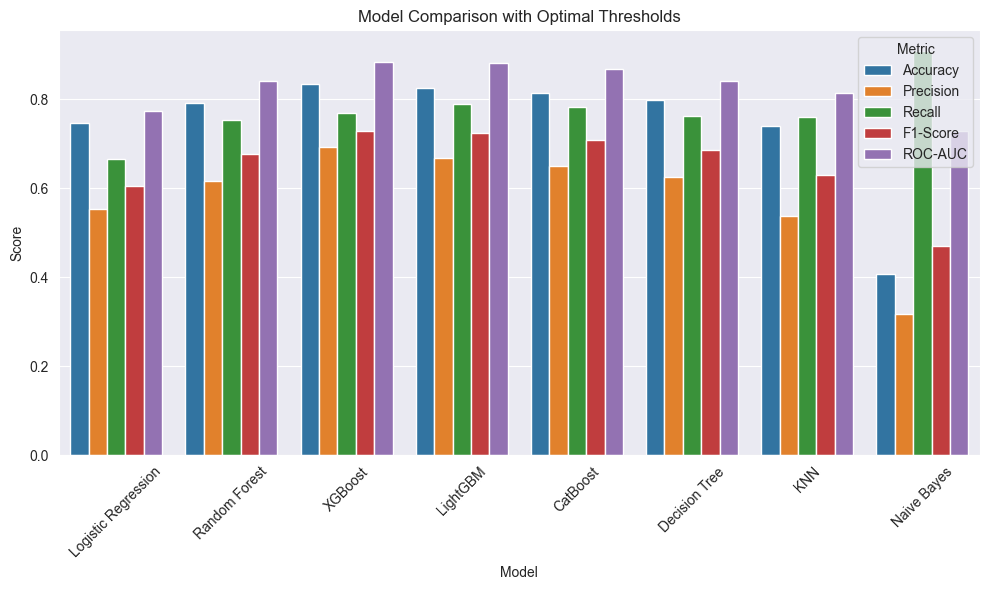

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import optuna
import matplotlib.pyplot as plt
import seaborn as sns


def objective(trial, model_name, X, y):
    """Objective function for Optuna to tune hyperparameters."""
    if model_name == "Random Forest":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 10, 100),
            "max_depth": trial.suggest_int("max_depth", 3, 5),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
            "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
            "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        }
        model = RandomForestClassifier(**params, random_state=42)

    elif model_name == "XGBoost":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 300),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
            "subsample": trial.suggest_float("subsample", 0.7, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
            "gamma": trial.suggest_float("gamma", 0, 5),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        }
        model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', random_state=42)

    elif model_name == "Logistic Regression":
        params = {
            "C": trial.suggest_float("C", 0.01, 10),
            "max_iter": trial.suggest_int("max_iter", 100, 1000),
        }
        model = LogisticRegression(**params, random_state=42)

    elif model_name == "LightGBM":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 300),
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
            "num_leaves": trial.suggest_int("num_leaves", 20, 100),
            "subsample": trial.suggest_float("subsample", 0.7, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
        }
        model = LGBMClassifier(**params, random_state=42)

    elif model_name == "CatBoost":
        params = {
            "iterations": trial.suggest_int("iterations", 100, 300),
            "depth": trial.suggest_int("depth", 3, 5),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        }
        model = CatBoostClassifier(**params, verbose=False, random_state=42)

    elif model_name == "Decision Tree":
        params = {
            "max_depth": trial.suggest_int("max_depth", 3, 7),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        }
        model = DecisionTreeClassifier(**params, random_state=42)

    elif model_name == "KNN":
        params = {
            "n_neighbors": trial.suggest_int("n_neighbors", 3, 20),
            "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
            "p": trial.suggest_int("p", 1, 2),
        }
        model = KNeighborsClassifier(**params)

    elif model_name == "Naive Bayes":
        model = GaussianNB()

    else:
        raise ValueError("Unknown model")

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []
    for train_idx, valid_idx in skf.split(X, y):
        x_train, x_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model.fit(x_train, y_train)
        y_proba = model.predict_proba(x_valid)[:, 1]
        aucs.append(roc_auc_score(y_valid, y_proba))

    return np.mean(aucs)

models = ["Logistic Regression", "Random Forest", "XGBoost", "LightGBM", "CatBoost", "Decision Tree", "KNN", "Naive Bayes"]
best_params = {}
for model_name in models:
    print(f"Tuning {model_name}...")
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, model_name, X_train_transformed_smote, y_train_smote), n_trials=10)
    best_params[model_name] = study.best_params if model_name != "Naive Bayes" else {}
    print(f"Best parameters for {model_name}: {study.best_params if model_name != 'Naive Bayes' else 'No parameters to tune'}")

def evaluate_thresholds(model, X_test, y_test, thresholds):
    """Evaluate a model's performance across multiple thresholds."""
    y_proba = model.predict_proba(X_test)[:, 1]
    results = []
    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        results.append({
            "Threshold": threshold,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba),
        })
    return pd.DataFrame(results)

thresholds = np.arange(0.1, 0.8, 0.1)
final_results = []
threshold_optimization_results = {}

for model_name, params in best_params.items():
    print(f"Evaluating {model_name}...")
    if model_name == "Random Forest":
        model = RandomForestClassifier(**params, random_state=42)
    elif model_name == "XGBoost":
        model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', random_state=42)
    elif model_name == "LightGBM":
        model = LGBMClassifier(**params, random_state=42)
    elif model_name == "CatBoost":
        model = CatBoostClassifier(**params, verbose=False, random_state=42)
    elif model_name == "Logistic Regression":
        model = LogisticRegression(**params, random_state=42)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(**params, random_state=42)
    elif model_name == "KNN":
        model = KNeighborsClassifier(**params)
    elif model_name == "Naive Bayes":
        model = GaussianNB()
    else:
        continue

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    all_threshold_results = []

    for train_idx, valid_idx in skf.split(X_test_transformed, y_test):
        skf_X_train, skf_X_valid = X_test_transformed.iloc[train_idx], X_test_transformed.iloc[valid_idx]
        skf_y_train, skf_y_valid = y_test.iloc[train_idx], y_test.iloc[valid_idx]

        model.fit(skf_X_train, skf_y_train)
        threshold_results = evaluate_thresholds(model, skf_X_valid, skf_y_valid, thresholds)
        all_threshold_results.append(threshold_results)

    avg_threshold_results = pd.concat(all_threshold_results).groupby("Threshold").mean().reset_index()
    optimal_threshold = avg_threshold_results.loc[avg_threshold_results["F1-Score"].idxmax(), "Threshold"]
    threshold_optimization_results[model_name] = {
        "Optimal Threshold": optimal_threshold,
        "Metrics": avg_threshold_results
    }
    final_results.append({
        "Model": model_name,
        "Optimal Threshold": optimal_threshold,
        **avg_threshold_results.loc[avg_threshold_results["F1-Score"].idxmax()].to_dict()
    })

final_results_df = pd.DataFrame(final_results)
print("\nFinal Results with Optimal Thresholds:")
print(final_results_df)

final_results_df.to_csv("model_comparison_with_thresholds.csv", index=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=final_results_df.melt(id_vars="Model", value_vars=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]),
            x="Model", y="value", hue="variable")
plt.title("Model Comparison with Optimal Thresholds")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.savefig("model_comparison_with_thresholds.png")
plt.show()


Classification Report for Stacking Classifier (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     14201
           1       0.76      0.78      0.77      5799

    accuracy                           0.86     20000
   macro avg       0.83      0.84      0.84     20000
weighted avg       0.86      0.86      0.86     20000



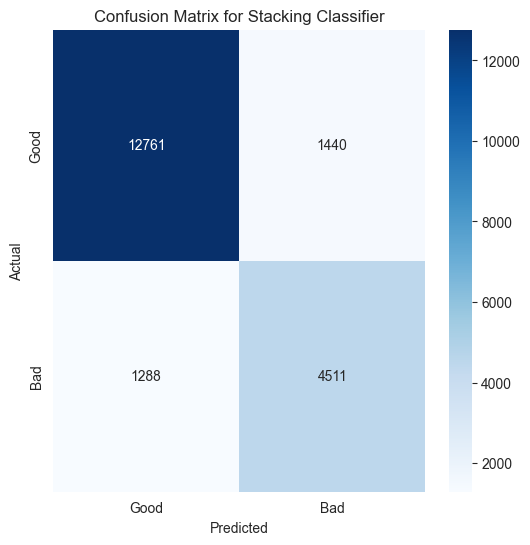

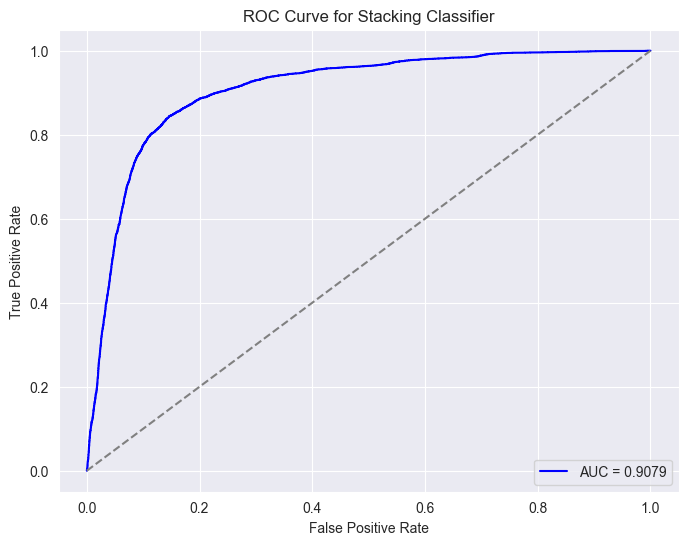

In [18]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.ensemble import StackingClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def find_optimal_threshold(y_true, y_proba):
    thresholds = np.arange(0.0, 1.0, 0.1)
    best_threshold = 0.5
    best_f1_score = 0.0

    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1_score:
            best_f1_score = f1
            best_threshold = threshold

    return best_threshold

xgb_model = XGBClassifier(**best_params["XGBoost"], use_label_encoder=False, eval_metric='logloss', random_state=42)
rf_model = RandomForestClassifier(**best_params["Random Forest"], random_state=42)
knn_model = KNeighborsClassifier(**best_params["KNN"])

meta_model = LogisticRegression(random_state=42)

stacking_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model), ('knn', knn_model)],
    final_estimator=meta_model,
    cv=5
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stacking_metrics = []

for train_idx, valid_idx in skf.split(X_train_transformed_smote, y_train_smote):
    X_fold_train, X_fold_valid = X_train_transformed_smote.iloc[train_idx], X_train_transformed_smote.iloc[valid_idx]
    y_fold_train, y_fold_valid = y_train_smote.iloc[train_idx], y_train_smote.iloc[valid_idx]

    stacking_model.fit(X_fold_train, y_fold_train)

    y_proba = stacking_model.predict_proba(X_fold_valid)[:, 1]

    optimal_threshold = find_optimal_threshold(y_fold_valid, y_proba)

    y_pred = (y_proba >= optimal_threshold).astype(int)

    stacking_metrics.append({
        'Accuracy': accuracy_score(y_fold_valid, y_pred),
        'Precision': precision_score(y_fold_valid, y_pred),
        'Recall': recall_score(y_fold_valid, y_pred),
        'F1-Score': f1_score(y_fold_valid, y_pred),
        'ROC-AUC': roc_auc_score(y_fold_valid, y_proba),
        'Optimal Threshold': optimal_threshold
    })

avg_stacking_metrics = pd.DataFrame(stacking_metrics).mean().to_dict()

stacking_model.fit(X_train_transformed_smote, y_train_smote)
y_proba_test = stacking_model.predict_proba(X_test_transformed)[:, 1]

optimal_threshold_test = find_optimal_threshold(y_test, y_proba_test)

y_pred_test = (y_proba_test >= optimal_threshold_test).astype(int)

stacking_test_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_test),
    'Precision': precision_score(y_test, y_pred_test),
    'Recall': recall_score(y_test, y_pred_test),
    'F1-Score': f1_score(y_test, y_pred_test),
    'ROC-AUC': roc_auc_score(y_test, y_proba_test),
    'Optimal Threshold': optimal_threshold_test
}

print("Classification Report for Stacking Classifier (Test Set):")
print(classification_report(y_test, y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.title('Confusion Matrix for Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {stacking_test_metrics["ROC-AUC"]:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend(loc='lower right')
plt.show()

In [19]:
from sklearn.metrics import get_scorer

scorer = get_scorer('roc_auc')

model = stacking_model

In [49]:
score_train = scorer(model, X_train_transformed, y_train)

score_test = scorer(model, X_test_transformed, y_test)

score_val = scorer(model, X_val_transformed, y_val)

print("Train AUC: ", score_train)
print("Test AUC: ", score_test)
print("Validation AUC: ", score_val)

Train AUC:  0.9162866095515035
Test AUC:  0.8908418159555105
Validation AUC:  0.8923234094220496


In [50]:
train_probas = model.predict_proba(X_train_transformed)[:, 1]  # Predicted probabilities for the positive class
test_probas = model.predict_proba(X_test_transformed)[:, 1]
valid_probas = model.predict_proba(X_val_transformed)[:, 1]

train_df = pd.DataFrame({"probas": train_probas, "flags": y_train})
test_df = pd.DataFrame({"probas": test_probas, "flags": y_test})
valid_df = pd.DataFrame({"probas": valid_probas, "flags": y_val})

print("Train DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())
print("\nValidation DataFrame:")
print(valid_df.head())


Train DataFrame:
         probas  flags
12094  0.001803      0
90066  0.515517      1
33414  0.739142      0
39850  0.796700      1
10765  0.111103      0

Test DataFrame:
         probas  flags
67268  0.069188      0
61108  0.103833      0
37422  0.060146      0
77487  0.115571      1
95060  0.124182      1

Validation DataFrame:
         probas  flags
86882  0.020974      0
49697  0.018695      0
38378  0.355041      0
95450  0.449272      0
83157  0.254984      1


In [51]:
# Step 3: Create bins for train data and save bin intervals
num_bins = 6
train_df["bins"], bin_edges = pd.qcut(train_df["probas"], q=num_bins, retbins=True, labels=False)

# Save bin intervals
bin_intervals = {f"Grade {i+1}": (bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges) - 1)}
print("\nSaved Bin Intervals:")
print(bin_intervals)

# Step 4: Assign bins to test and validation based on train bin edges
test_df["bins"] = pd.cut(test_df["probas"], bins=bin_edges, labels=False, include_lowest=True)
valid_df["bins"] = pd.cut(valid_df["probas"], bins=bin_edges, labels=False, include_lowest=True)

# Step 5: Add bin classification based on bin number (higher bin = worse)
def classify_bins(df):
    """ Add a classification column where greater bins mean worse categories """
    classification_map = {
        0: "Excellent",
        1: "Good",
        2: "Average",
        3: "Below Average",
        4: "Poor",
        5: "Very Poor"
    }
    df["bin_category"] = df["bins"].map(classification_map)
    return df

# Apply classification to train, test, and validation
train_df = classify_bins(train_df)
test_df = classify_bins(test_df)
valid_df = classify_bins(valid_df)

# Step 6: Calculate positive proportions and counts
def calculate_bin_metrics(df):
    """ Calculate positive proportions and counts for each bin """
    metrics = df.groupby(["bins", "bin_category"])["flags"].agg(["mean", "sum", "count"]).reset_index()
    metrics["negatives"] = metrics["count"] - metrics["sum"]
    metrics["positives"] = metrics["sum"]
    return metrics

train_metrics = calculate_bin_metrics(train_df)
test_metrics = calculate_bin_metrics(test_df)
valid_metrics = calculate_bin_metrics(valid_df)

# Step 7: Display results
print("\nTrain Metrics with Bin Categories:")
print(train_metrics)

print("\nTest Metrics with Bin Categories:")
print(test_metrics)

print("\nValidation Metrics with Bin Categories:")
print(valid_metrics)



Saved Bin Intervals:
{'Grade 1': (0.0007505670180881403, 0.04735369309103125), 'Grade 2': (0.04735369309103125, 0.08605093882736149), 'Grade 3': (0.08605093882736149, 0.13834386531354237), 'Grade 4': (0.13834386531354237, 0.36310973020111625), 'Grade 5': (0.36310973020111625, 0.7246656883727021), 'Grade 6': (0.7246656883727021, 0.9157009912366266)}

Train Metrics with Bin Categories:
   bins   bin_category      mean   sum  count  negatives  positives
0     0      Excellent  0.000343     4  11667      11663          4
1     1           Good  0.018858   220  11666      11446        220
2     2        Average  0.063684   743  11667      10924        743
3     3  Below Average  0.248757  2902  11666       8764       2902
4     4           Poor  0.569041  6639  11667       5028       6639
5     5      Very Poor  0.839205  9791  11667       1876       9791

Test Metrics with Bin Categories:
   bins   bin_category      mean   sum  count  negatives  positives
0     0      Excellent  0.002091 

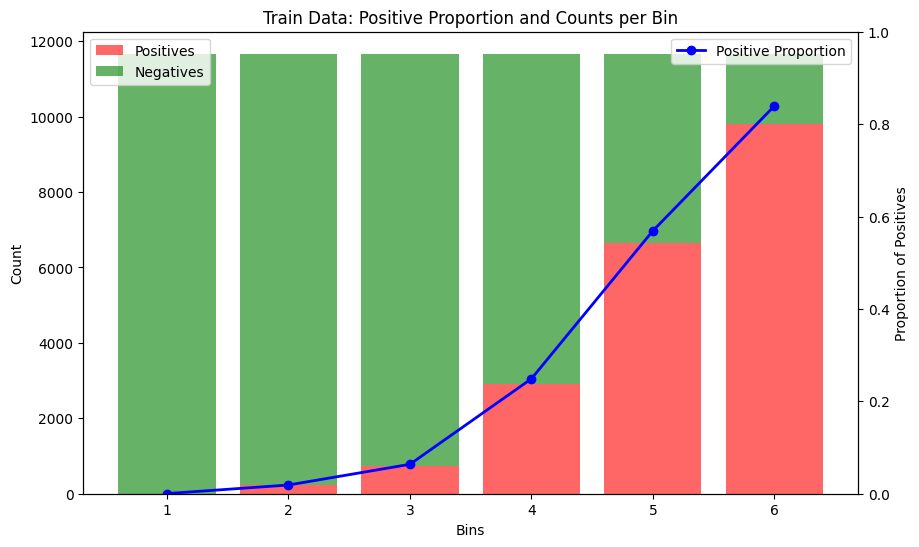

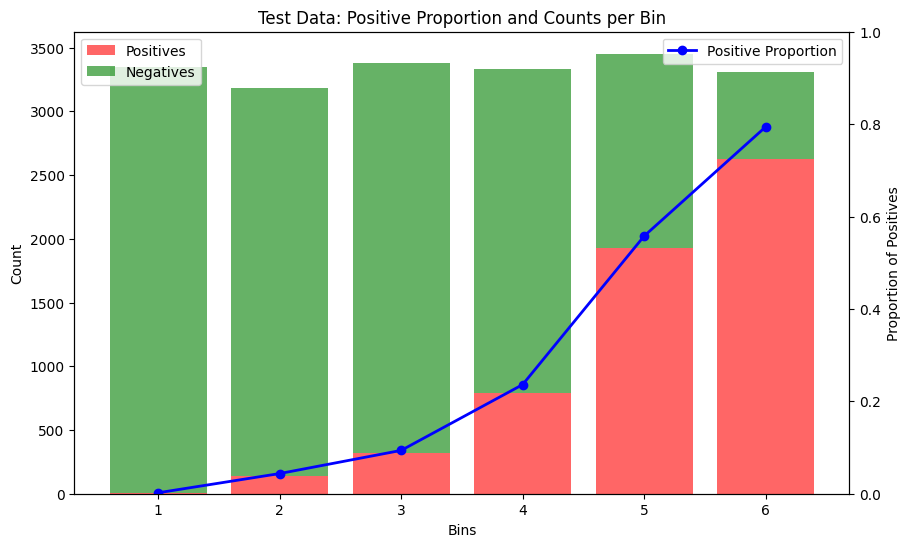

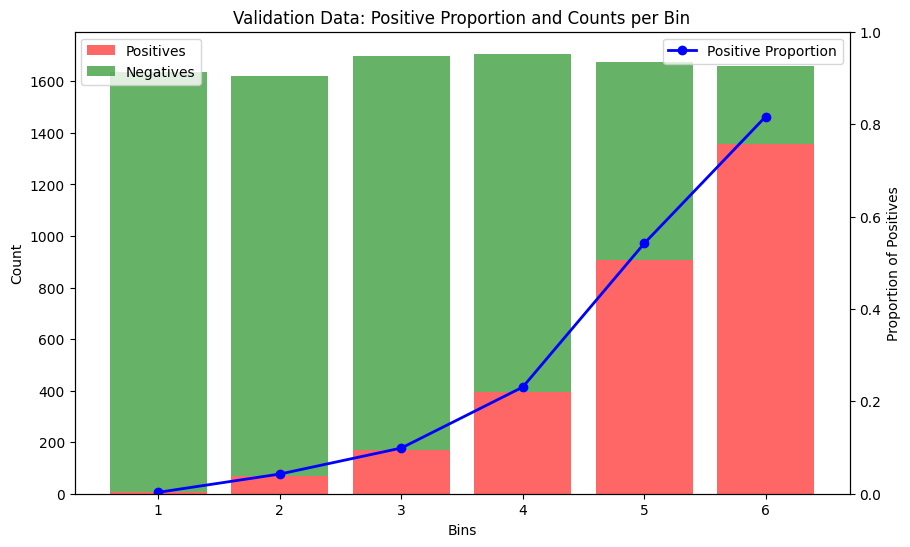

In [52]:
import matplotlib.pyplot as plt
# Step 6: Plot the results
def plot_metrics(metrics, title):
    """ Plot positive proportions and counts for each bin """
    bins = range(1, len(metrics) + 1)
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar plot for positive and negative counts
    ax1.bar(bins, metrics["positives"], color='red', label="Positives", alpha=0.6)
    ax1.bar(bins, metrics["negatives"], bottom=metrics["positives"], color='green', label="Negatives", alpha=0.6)
    ax1.set_ylabel("Count")
    ax1.set_xlabel("Bins")
    ax1.set_title(title)
    ax1.legend(loc="upper left")

    # Line plot for positive proportions
    ax2 = ax1.twinx()
    ax2.plot(bins, metrics["mean"], color='blue', marker='o', linestyle='-', linewidth=2, label="Positive Proportion")
    ax2.set_ylabel("Proportion of Positives")
    ax2.set_ylim(0, 1)
    ax2.legend(loc="upper right")

    plt.show()

# Plot for train, test, and validation
plot_metrics(train_metrics, "Train Data: Positive Proportion and Counts per Bin")
plot_metrics(test_metrics, "Test Data: Positive Proportion and Counts per Bin")
plot_metrics(valid_metrics, "Validation Data: Positive Proportion and Counts per Bin")

In [53]:
import json

with open("bin_intervals.json", "w") as f:
    json.dump(bin_intervals, f, indent=4)

In [54]:
X_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
12094,0x5cdc,CUS_0x3562,July,Marce,34_,821-34-2286,Media_Manager,43436.27,NaN,0,...,4.0,Good,63.92,29.946936,17 Years and 5 Months,No,58.411588,87.44433220001284,High_spent_Large_value_payments,442.91299672547774
90066,0x225bc,CUS_0x5cb8,March,radk,34,445-76-5961,_______,15362.78_,1441.231667,9,...,7.0,_,3773.56,25.017261,NaN,Yes,45.754950,126.14020063907856,Low_spent_Small_value_payments,262.2280160743394
33414,0xd9c8,CUS_0x3bb8,July,Alister Bullt,35,855-98-5797,Doctor,41077.12,3390.093333,9,...,12.0,Bad,1507.89,23.445592,9 Years and 11 Months,Yes,199.584000,132.28124819516694,High_spent_Medium_value_payments,257.1440847655278
39850,0xff80,CUS_0x8247,March,Daye,16,597-93-5210,Scientist,9670.15,733.845833,8,...,7.0,Bad,3566.81,29.913943,4 Years and 4 Months,Yes,35.319743,__10000__,Low_spent_Small_value_payments,281.3827838276423
10765,0x5513,CUS_0x91f,June,Thomas Ferrarot,44,740-45-3202,Doctor,21450.72,1713.560000,2,...,1.0,Good,123.12,33.175057,33 Years and 3 Months,No,31.296901,NaN,High_spent_Large_value_payments,337.1057430916695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91669,0x22f1f,CUS_0xb615,June,Emilyh,24,744-77-7523,Teacher,21206.48,1631.206667,7,...,2.0,_,231.87,24.408654,19 Years and 1 Months,No,0.000000,94.48062734383845,High_spent_Small_value_payments,328.64003932282816
83626,0x20000,CUS_0x649e,March,Frank Jackj,23,815-38-6088,Musician,69324.4,5509.033333,828,...,7.0,Standard,1075.73,23.769435,17 Years and 3 Months,Yes,115.008706,609.1796819297018,Low_spent_Small_value_payments,116.71494514955087
79873,0x1ea03,CUS_0x8099,February,ram,51,767-19-9517,Writer,112400.24,9657.686667,7,...,4.0,_,57.91,38.650498,32 Years and 2 Months,Yes,203.517564,248.30094005161249,High_spent_Medium_value_payments,763.9501630936113
34860,0xe242,CUS_0xc283,May,Viswanathaz,43,768-07-9404,Manager,16012.64,NaN,8,...,11.0,Bad,1527.67,32.921174,17 Years and 6 Months,Yes,31.332122,50.71516084133082,Low_spent_Small_value_payments,318.7913837789545


In [55]:
model_pipeline = Pipeline(steps = pipeline.steps + [
    ('model', model)
])

model_pipeline.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20299, number of negative: 49701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3707
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289986 -> initscore=-0.895453
[LightGBM] [Info] Start training from score -0.895453


Pipeline(steps=[('Drop_Columns',
                 ColumnDropper(columns=['ID', 'Customer_ID', 'Name', 'SSN'])),
                ('DType_Correction',
                 DTypeCorrection(columns=['Num_of_Loan', 'Age', 'Annual_Income',
                                          'Num_of_Delayed_Payment',
                                          'Changed_Credit_Limit',
                                          'Outstanding_Debt',
                                          'Amount_invested_monthly',
                                          'Monthly_Balance'])),
                ('Fill_NA',
                 FillNA(fill_values={'Amount_invested_monthly': 637.2277950035283,
                                     'Credit_History_Age': '0',
                                     'Monthly_Inhand_Salary': 4202.696985969621,
                                     'Num_Credit_Inquiries': 6.0,
                                     'Num_of_Delayed_Payment': 14.0,
                                     'Type_of_Loan': 'Not Specified'})),
                ('Feature_Engineer', FeatureEngineer()),
                ('Scaler_Encoder', Scaler_Encoder()),
                ('Multicollinearity_reducer', MulticollinearityReducer()),
                ('model', LGBMClassifier(random_state=42))])

In [56]:
import dill

with open("model.pkl", "wb") as f:
    dill.dump(model_pipeline, f)

In [57]:
pip install lime


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
import shap
import matplotlib.pyplot as plt


# SHAP EXPLANATIONS
# Explaining predictions using SHAP TreeExplainer (works for tree-based models)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test_transformed)

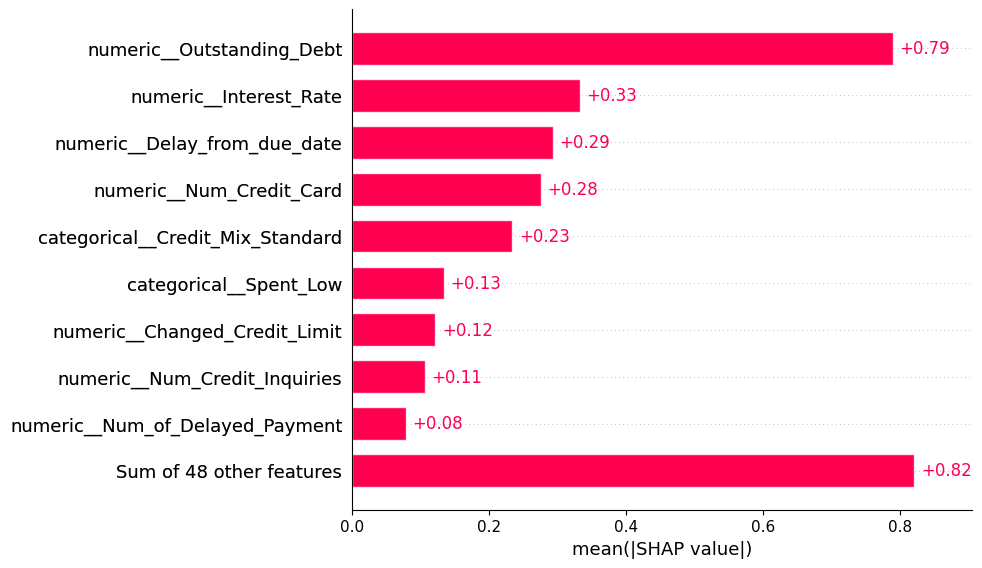

In [59]:
shap.plots.bar(shap_values)

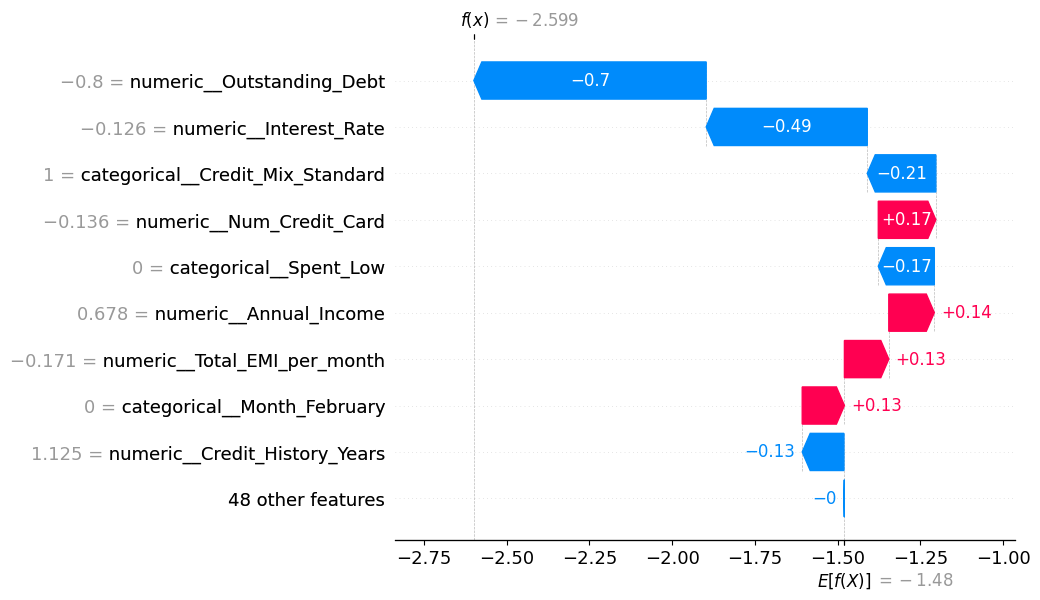

In [60]:
shap.plots.waterfall(shap_values[0])

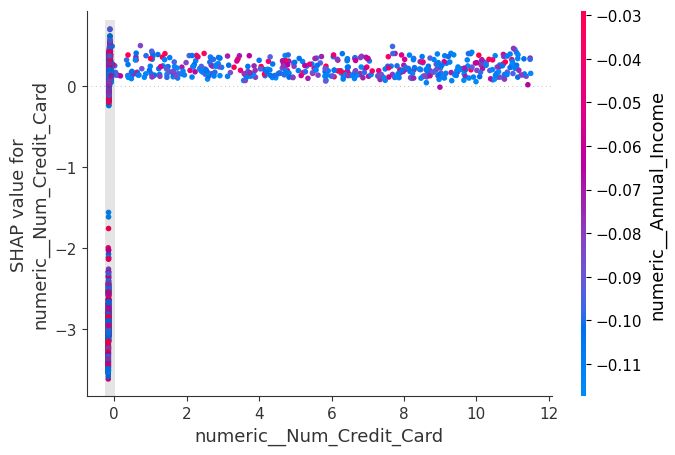

In [61]:
shap.plots.scatter(shap_values[:, 4], color=shap_values[:, 1])

In [62]:

shap.initjs()

shap_explanation = shap.Explanation(values=shap_values.values,
                                    base_values=explainer.expected_value,
                                    data=X_test_transformed)

# SHAP Force Plot for the first prediction
shap.plots.force(shap_explanation[0])


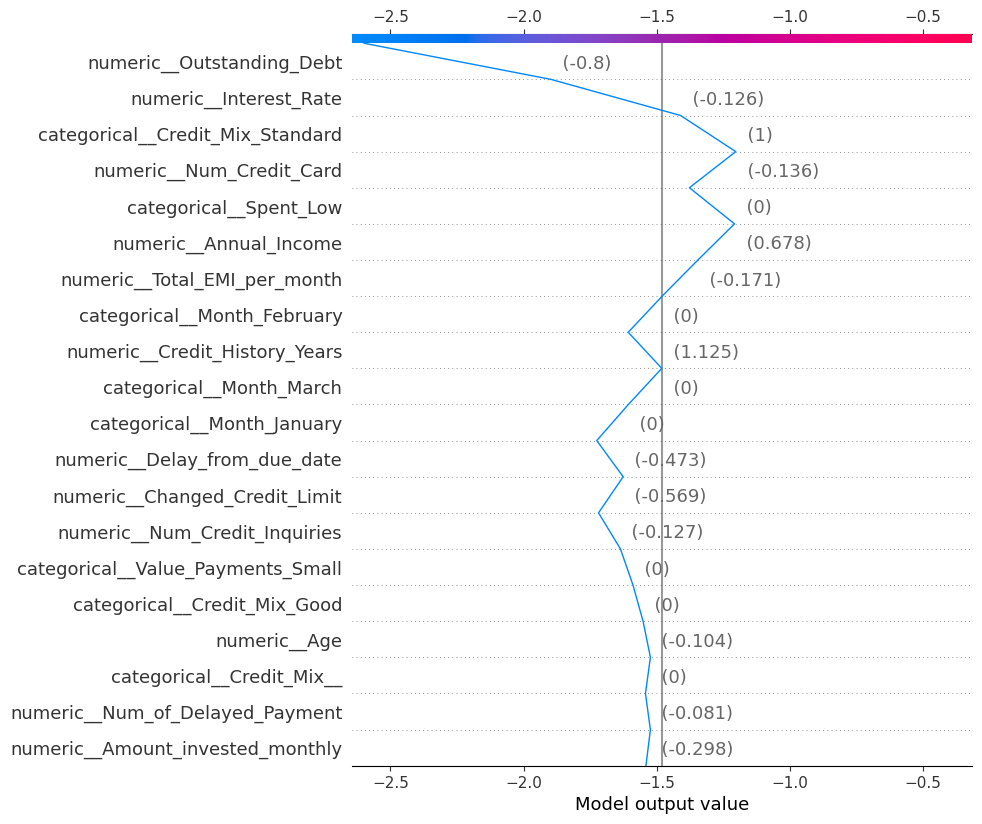

In [63]:

shap_values_array = shap_values.values  # SHAP values as numpy array
base_value = explainer.expected_value  # Base value
data_row = X_test_transformed.iloc[0]


shap.plots.decision(
    base_value=base_value,
    shap_values=shap_values_array[0],
    features=data_row,
    feature_names=X_test_transformed.columns.tolist()
)


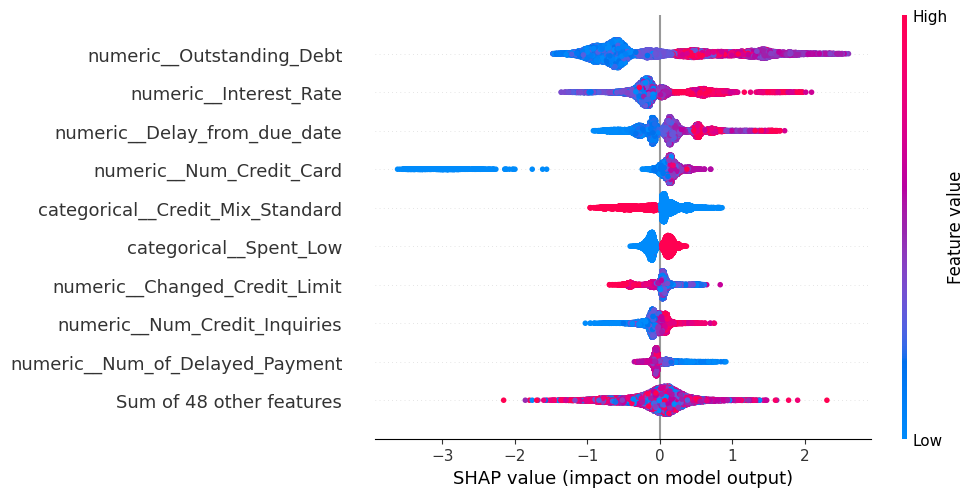

In [64]:
shap.plots.beeswarm(shap_values)

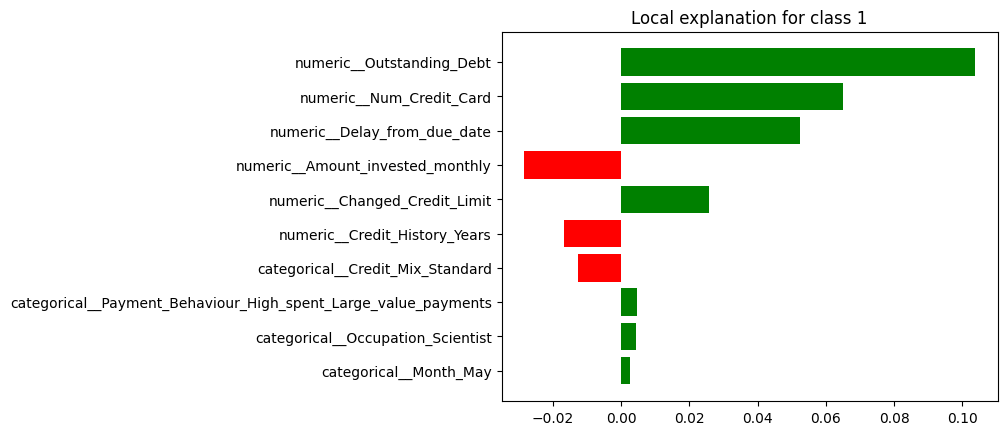

In [33]:
import lime
import lime.lime_tabular

X_train_array = X_train_transformed.values
X_test_array = X_test_transformed.values


feature_names = X_train_transformed.columns.tolist()


explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_array,
    mode="classification",
    feature_names=feature_names,
    discretize_continuous=False
)


sample_index = 0
exp = explainer_lime.explain_instance(
    X_test_array[sample_index],
    model.predict_proba,
    num_features=10
)


exp.as_pyplot_figure()
plt.show()